In [97]:
import numpy as np 
import random
from itertools import chain, combinations
import time
import matplotlib.pyplot as plt

# Question 4 


In [98]:
# n = 1
# m = 1
# g = m x n (randomly filled with 0 and 1)



# Question 4d. 
Write code implementing both of your methods. Each routine should take as input the following parameters:
n
m 
g_{11} g_{12} . . . g_{1n}
g_{21} g_{22} . . . g_{2n}
... 
g_{m1} g_{m2} . . . g_{mn} 
where n is the number of reads, m is the number of genomes, and g_ij is 1 if genome i contains read j and 0 otherwise.

# Heuristic Approach

In [125]:
def heuristicStep(n, m, g, subset):
    maxCount = -1
    for row in range(m):
        if not(row in subset):
            #counts = g[row].count(1)
            counts = np.count_nonzero(g[row])
            if maxCount < counts:
                maxCount = counts
    return maxCount
        
def runGreedy(n, m, g):
    subset = []
    iters = -1
    while n>0 :
        if iters < m:
            count = heuristicStep(n,m,g,subset)
            for row in range(m):
                if np.count_nonzero(g[row]) == count:
                    subset.append(row)
            colsAccounted = [] 
            for row in subset:
                for i in range(n):
                    if (g[row][i] == 1):
                        colsAccounted.append(i)
            colsThatRemain = []
            for i in range(n):
                if not(i in colsAccounted):
                    colsThatRemain.append(i)
            g_new = [] 
            for r in g:
                rNew = []
                for col in colsThatRemain:
                    rNew.append(r[col])
                g_new.append(rNew)
            if len(g_new) != 0:
                n = len(g_new[0])
            g = g_new
            iters += 1
        else:
            break
    if n==0:
        return subset
    else:
        return []




# Brute Force Approach


In [126]:
# function to create all possible subsets
# returns the indices of the rows in the subset
def createSubsets(m,g):
    allPossibleSubsets = []
    for row in range(m): # don't want empty subsets
        for i in combinations(range(m), row+1):
            allPossibleSubsets.append(i)
    return allPossibleSubsets


def bruteForce(n,m,g):
    # check every subset and count the number of reads covered 
    rowIndices = createSubsets(m,g)
    
    # if the number of subsets is 1 
    if len(rowIndices) == 1:
        counts = np.count_nonzero(g[0])
        if counts == n:
            return [0]
        
    cols = [0]*n
    subsets = []
    
    for tup in rowIndices:
        if len(tup) == 1:
            i = tup[0]
            counts = np.count_nonzero(g[i])
            if counts == n:
                return [tup[0]]
            
        else:
            #currCount = 0
            currSubset = tup
            #currLen = len(tup)
            for rowIndex in tup: # loop through a row
                for col in range(n): # loop through the col 
                    # if g[rowIndex][col] == 1:
                    if (g[rowIndex][col] == 1):
                        cols[col] = 1
    
            if sum(cols) == n:
                subsets.append(currSubset)
            cols = [0]*n
    #print(subsets)
    if len(subsets) != 0:
        smallestSubset = []
        for i in subsets[0]:
            smallestSubset.append(i)
        return smallestSubset  
    else:
        return []                     



    # return the smallest subset containing all the reads
    

# Question 4e. 
Test your methods by creating a wrapper program that takes as input m, n, and a number of
iterations k. For each iteration, it should generate a random problem instance by filling in each
element of g_{ij} to be 0 or 1 with 50 % probability. It should record the average solution size and
the average time to derive a solution for each method over all iterations. Run your program for
k = 100 and m = n = 1, m = n = 2, m = n = 3, etc., until one of the methods becomes too slow
to be practical. Return a plots of the average solution size and the average time required for each
methods as a function of n

In [127]:
def makeRandomMatrices(m,n):
    g = np.random.randint(2, size=(m,n))
    return g  

In [130]:
# This function runs heuristic and brute force functions on np.arrays of size mxn filled with randomly filled with 0 and 1. 
# Runs both approaches for k= 100 iterations and for m=n=1, m=n=2, ... , m=n=15
# The graphs presented below are based on the randomly generated g's 

heuristicTime = dict()
heuristcSolutionSize = dict()

bruteTime = dict()
bruteSolutionSize = dict()

def wrapper(m,n,k):
    bruteSolution = []
    gS = []
    for i in range(k):
        g = makeRandomMatrices(m,n)
        gS.append(g)
    start = time.time()
    for g in gS:
        sol = bruteForce(m, n, g)
        if len(sol) != 0:
            bruteSolution.append(len(sol)) #setting solution size 0 for no solution
    end = time.time()
    bruteTime[m] = end-start
    bruteSolutionSize[m] = sum(bruteSolution)/len(bruteSolution)
    
    greedySolution = []
    start = time.time()
    for g in gS:
        sol = runGreedy(m, n, g) # to make sure brute force and greedy act on same g
        if len(sol) != 0:
            greedySolution.append(len(sol)) #setting solution size 0 for no solution
    end = time.time()
    heuristicTime[m] = end-start
    heuristcSolutionSize[m] = sum(greedySolution)/len(greedySolution)
    

# Run it for m=n=1, m=n=2, ..., m=n=15
for i in range(1,16):
    wrapper(i,i,100)

print("Heuristic Solution size:", heuristcSolutionSize)
print("Brute Force Solution size:", bruteSolutionSize)

Heuristic Solution size: {1: 1.0, 2: 1.35, 3: 1.6666666666666667, 4: 2.136986301369863, 5: 2.7701149425287355, 6: 2.9431818181818183, 7: 3.4210526315789473, 8: 3.84375, 9: 3.63, 10: 4.1020408163265305, 11: 3.96, 12: 4.04, 13: 4.888888888888889, 14: 4.51, 15: 4.38}
Brute Force Solution size: {1: 1.0, 2: 1.2333333333333334, 3: 1.5614035087719298, 4: 1.7945205479452055, 5: 1.9540229885057472, 6: 2.0568181818181817, 7: 2.126315789473684, 8: 2.2291666666666665, 9: 2.22, 10: 2.2551020408163267, 11: 2.21, 12: 2.28, 13: 2.2525252525252526, 14: 2.36, 15: 2.32}


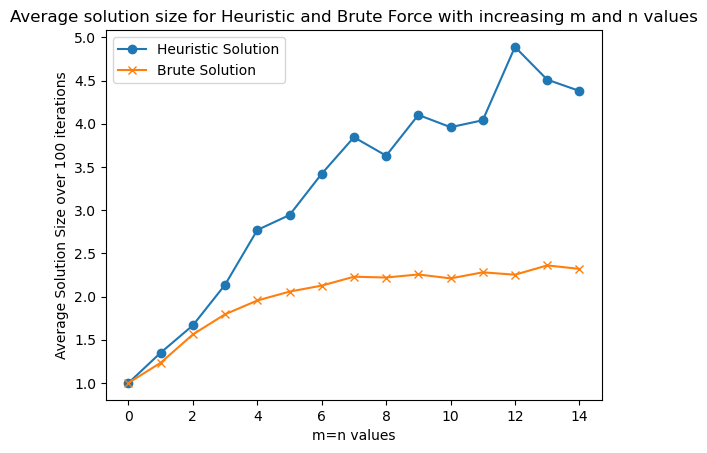

In [131]:
# Plotting Brute Force and Heuristic
# x-axis =  values of n, y-axis = solution size 
plt.plot(range(len(heuristcSolutionSize)), list(heuristcSolutionSize.values()), label='Heuristic Solution', marker='o')
plt.plot(range(len(bruteSolutionSize)), list(bruteSolutionSize.values()), label='Brute Solution', marker='x')
plt.xlabel("m=n values")
plt.ylabel("Average Solution Size over 100 iterations")
plt.legend()
plt.title("Average solution size for Heuristic and Brute Force with increasing m and n values")
plt.show()

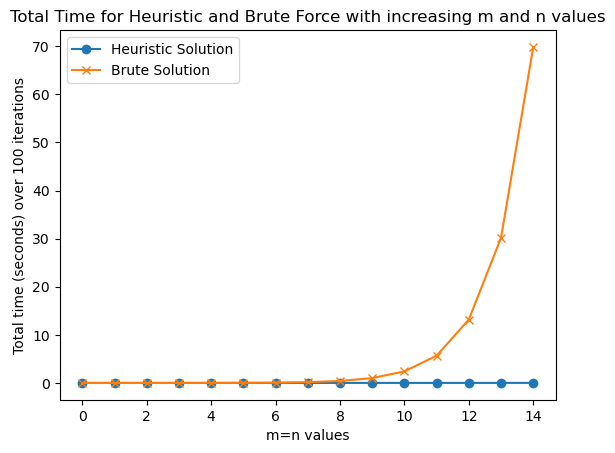

In [132]:
# Plotting Brute Force and Heuristic
# x-axis =  values of n, y-axis = total time 
plt.plot(range(len(heuristcSolutionSize)), list(heuristicTime.values()), label='Heuristic Solution', marker='o')
plt.plot(range(len(bruteSolutionSize)), list(bruteTime.values()), label='Brute Solution', marker='x')
plt.xlabel("m=n values")
plt.ylabel("Total time (seconds) over 100 iterations")
plt.legend()
plt.title("Total Time for Heuristic and Brute Force with increasing m and n values")
plt.show()

# Read in the text file that contains n, m, and g
Name of the file = input.txt

In [133]:
# Please use this function to run an input text file that contains n,m,g in the format stated in the problem set

def readTxtFile(inputFile):
    myFile = open("inputFile.txt", "r")
    lines = []
    variables = dict()
    for line in myFile:
        line = line.strip()
        temp = line.split(" ")
        lines.append(temp)
    n = int(lines[0][0])
    m = int(lines[1][0])
    g = []
    for row in lines[2:]:
        g.append([])
        for bit in row:
            g[-1].append(int(bit))

    # Running Heuristic approach 
    greedySolution = runGreedy(n,m,g)
    greedySubset  = []
    for index in greedySolution:
        greedySubset.append(g[index])
    print("Subset obtained from Heuristic approach:", greedySubset)

    # Running Brute Force approach 
    bruteForceSolution = bruteForce(n,m,g)
    bruteSubset  = []
    for index in bruteForceSolution:
        bruteSubset.append(g[index])
    print("Subset obtained from Brute Force approach:", bruteSubset)
    
    return (n,m,g)

# Calling the readTextFile function
# You can change the name of the input file, my example file was names "inputFile.txt" and was in the same directory as my notebook
n, m, g = readTxtFile("inputFile.txt")




Subset obtained from Heuristic approach: [[1, 0], [0, 1]]
Subset obtained from Brute Force approach: [[1, 0], [0, 1]]
